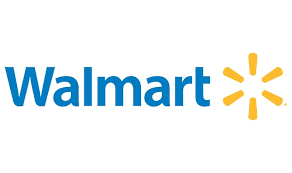

# Walmart 

## Problem Statement:
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
walmart = pd.read_csv(r"C:\Users\VINAY\Desktop\Walmart.csv")

In [3]:
walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### Shape of the Data:

In [4]:
walmart.shape

(550068, 10)

### Names of the columns:


In [5]:
walmart.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

### Data types of attributes:


In [6]:
walmart.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

#### Assuming purchase values are in $

### Null values detection:


In [7]:
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### There are no Null / missing values observed in the dataset 

### Non-Graphical Analysis: Value Count and Unique attributes with comments


In [8]:
walmart['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

#### User ID 1001680 is the most frequent customer, followed by 1004277 and 1001941 respectively.
#### User ID 1000708 is the least frequent customer.

In [9]:
walmart['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

#### Product ID P00265242 is most sold product, followed by Product Id P00025442 and P00110742

In [10]:
walmart['Age'].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

#### Customers in the age group 26 - 35 are the most frequent customers of Walmart, contributing around 40% of sales.
#### The age group 36 - 45 are the second most frequent customers of Walmart, contributing 20% of sales.

In [11]:
walmart['City_Category'].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

#### More number of customers of Walmart are from City category B, followed by C and A.

In [12]:
walmart['Stay_In_Current_City_Years'].value_counts(normalize=True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

#### The majority of customers only stay in the city for one year, making up 35% of the customers. 

In [13]:
walmart['Marital_Status'].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

#### around 60% of customers have Martial Status as 0, while 40% have Martial Status as 1. 

In [14]:
walmart['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

#### The average purchase amount spent by a customer is $ 9263.96


#### Median amount spent by the customer is $ 8047

In [15]:
walmart.groupby(by='Gender')['Purchase'].mean().sort_values(ascending=False)

Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64

#### The average purchase amount spent by the male customer is 9437.52 and by female customer is 8734.56 dollers 

In [16]:
walmart.groupby(by='Age')['Purchase'].mean().sort_values(ascending=False)

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

#### The age group 0-17 has a very low average amount purchase
#### The average purchase amount spent by the 51-55 age group is the maximum among the other age groups

In [17]:
walmart.groupby(by='City_Category')['Purchase'].mean().sort_values(ascending=False)

City_Category
C    9719.920993
B    9151.300563
A    8911.939216
Name: Purchase, dtype: float64

#### The average purchase amount spent by city category C is the highest, followed by B and A.

In [18]:
#walmart['Product_ID'].value_counts()
walmart['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

### Visual Analysis: Univariate and Bivariate

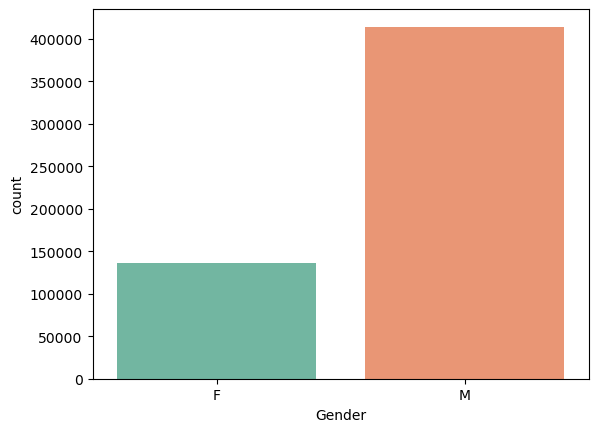

In [19]:
sns.countplot(data=walmart, x='Gender', palette='Set2')
plt.show()

#### There are more orders by male customers than female customers

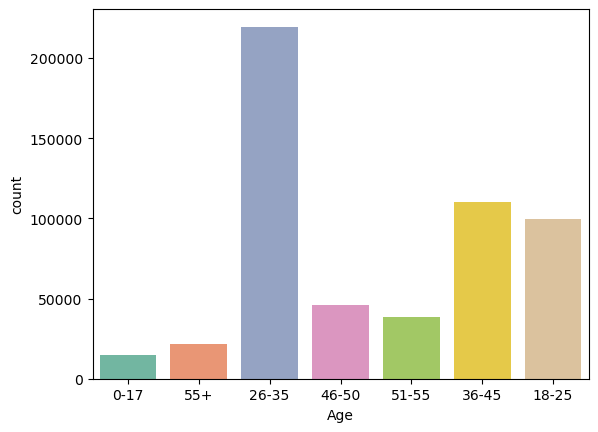

In [20]:
sns.countplot(data=walmart, x='Age', palette='Set2')
plt.show()

#### Most number of customers are from age group 26-35, followed by 36-45 age group and 18-25 age group

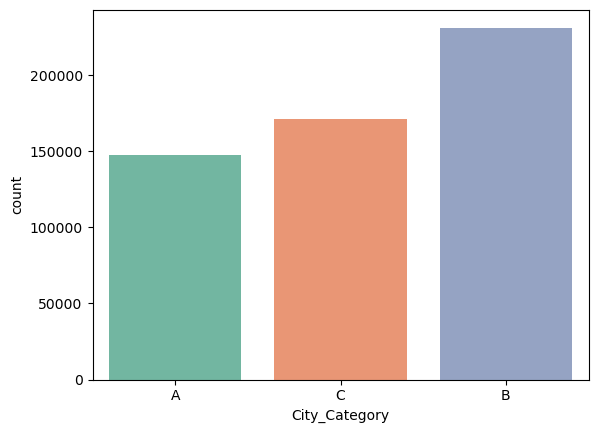

In [21]:
sns.countplot(data=walmart, x='City_Category', palette='Set2')
plt.show()

#### More number of customers of Walmart are from City category B, followed by C and A.

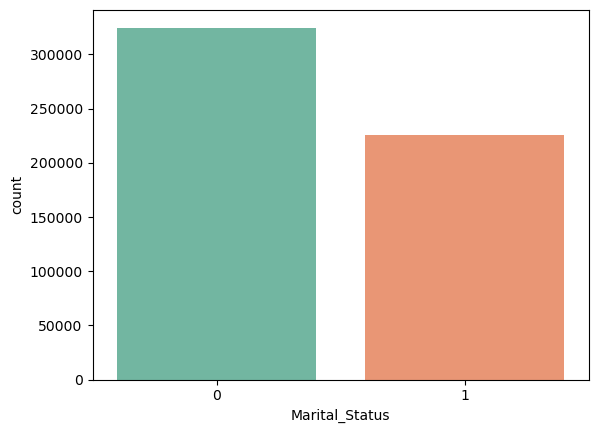

In [22]:
sns.countplot(data=walmart, x='Marital_Status', palette='Set2')
plt.show()

#### Around 60% of customers have Martial Status as 0, while 40% have Martial Status as 1.

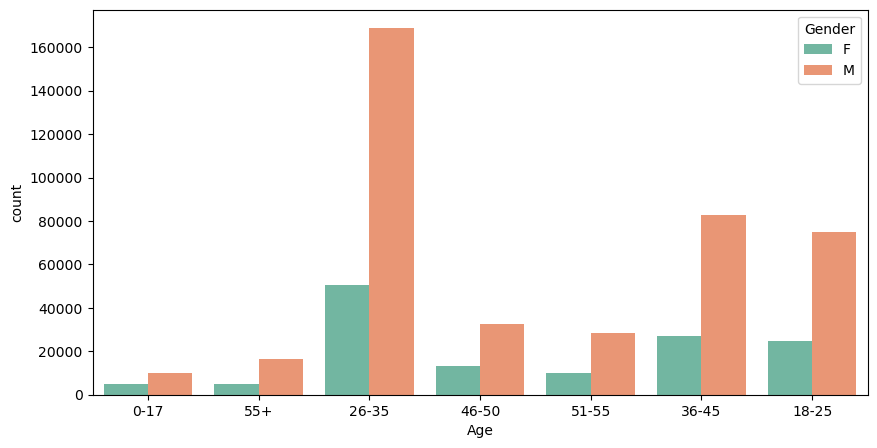

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=walmart, x="Age", hue="Gender", palette="Set2")
plt.show()

#### The above figure shows relation between gender and age of Walmart customers. as seen in preceeding graphs there are more number of customers in age 26-35. In each age group male customers are more than female customers 

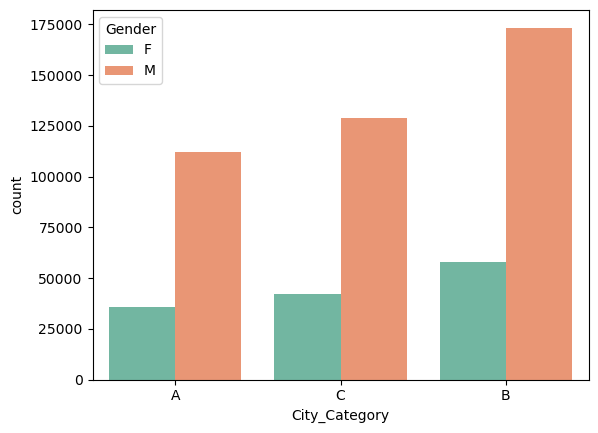

In [24]:
sns.countplot(data=walmart, x="City_Category", hue="Gender", palette="Set2")
plt.show()

#### The above figure shows relation between gender and City_Category of Walmart customers. as seen in preceeding graphs there are more number of customers in category B. In each city_category male customers are more than female customers 

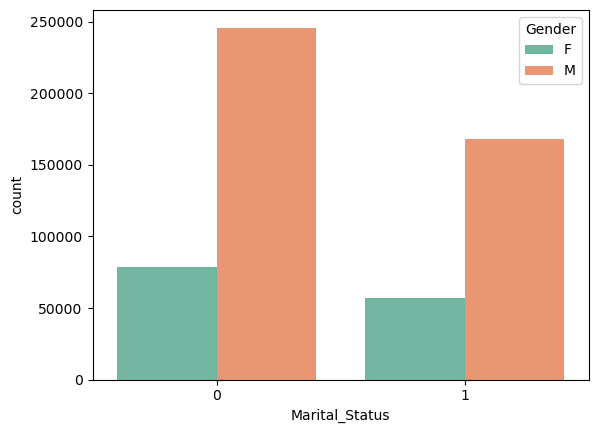

In [25]:
sns.countplot(data=walmart, x="Marital_Status", hue="Gender", palette="Set2")
plt.show()

#### Male count is higher than the female count both categories of marital status.

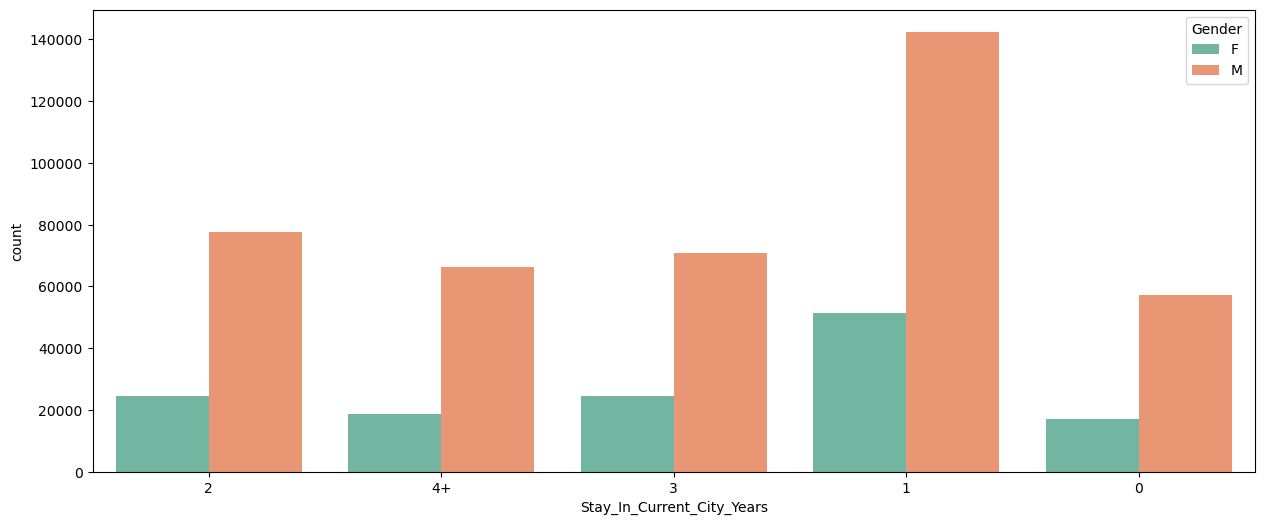

In [87]:
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x="Stay_In_Current_City_Years", hue="Gender", palette="Set2")
plt.show()

#### Most males prefer to stay in the same city for one year

### Outlier detection:

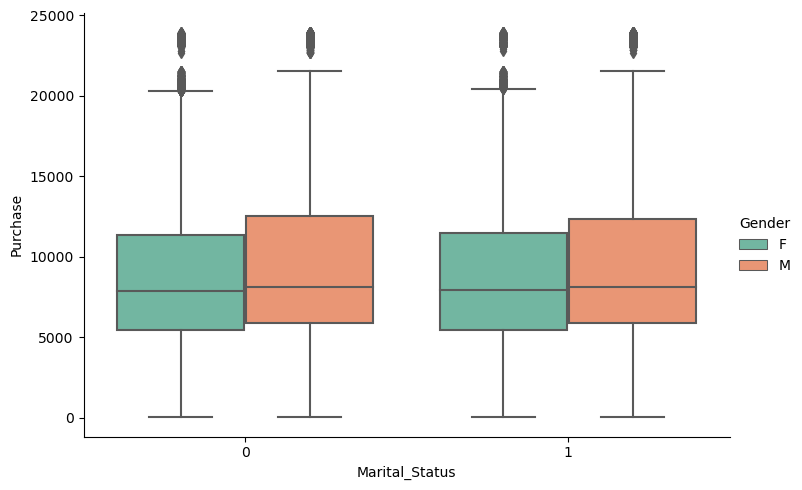

In [26]:
sns.catplot(data=walmart, x="Marital_Status", y="Purchase", hue="Gender", kind="box", palette="Set2", aspect=1.5)
plt.show()

#### There are less purchase outliers for both marital status in male gender.
#### The median Walmart store expenditure for both genders in marital status 0 and 1 is nearly identical

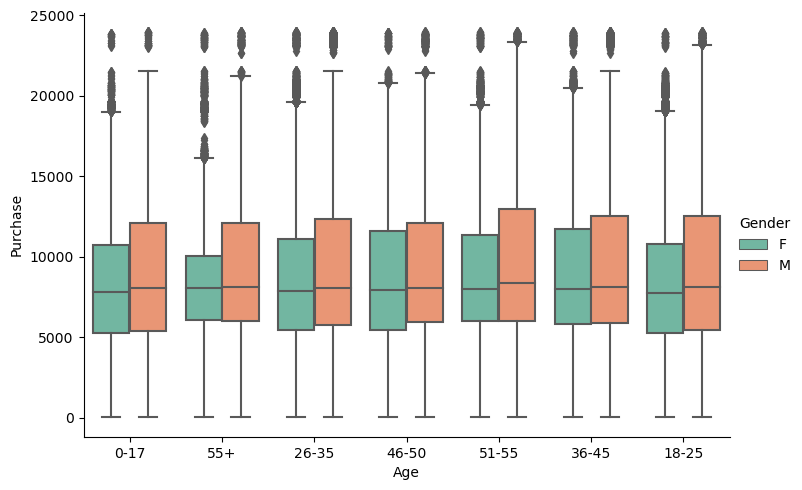

In [27]:
sns.catplot(data=walmart, x="Age", y="Purchase", hue="Gender", kind="box", palette="Set2", aspect=1.5)
plt.show()
     

#### The median purchase expenditure for all the age groups, in both genders, is almost identical.
#### There are more outliers observed in female gender compared to male gender in all age groups.

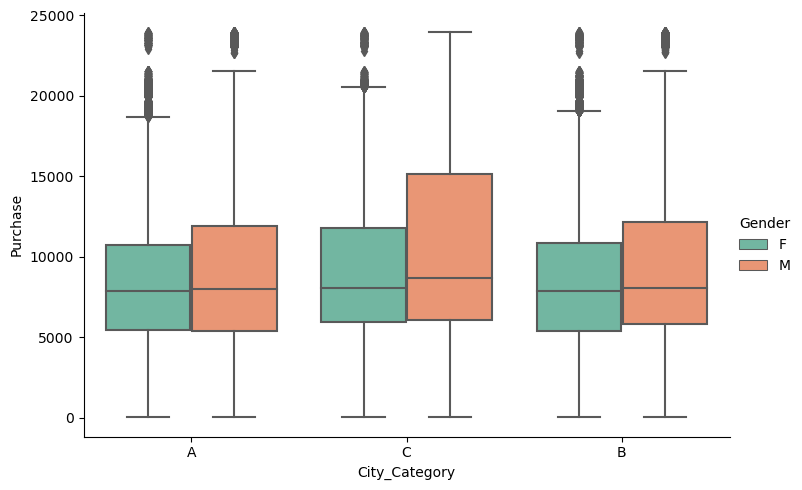

In [28]:
sns.catplot(data=walmart, x="City_Category", y="Purchase", hue="Gender", kind="box", palette="Set2", aspect=1.5)
plt.show()

Text(0.5, 1.0, 'No. of product purchased per gender per city category')

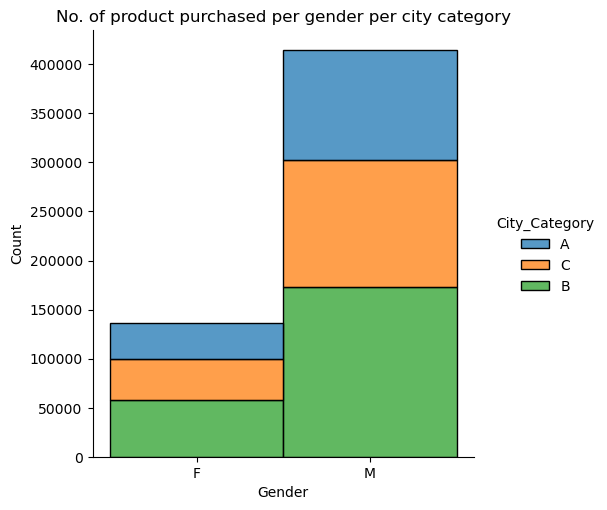

In [78]:
sns.displot(data=walmart,hue=walmart.City_Category, x="Gender", multiple="stack", color='skyblue')
plt.xlabel('Gender')
plt.title('No. of product purchased per gender per city category')

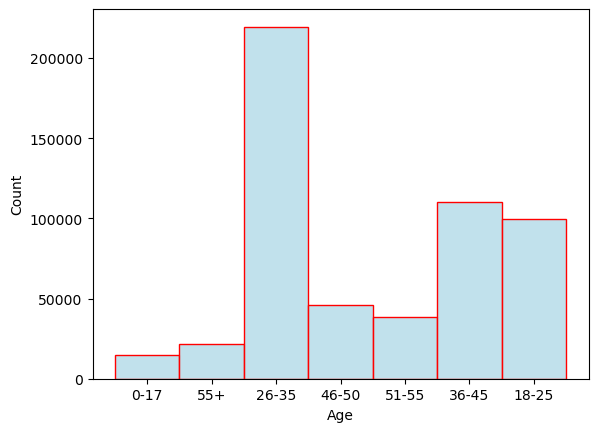

In [79]:
sns.histplot(x='Age', data=walmart, bins=20, color = "lightblue", ec="red");

In [80]:
bins = [1, 1000,5000,10000,15000, 20000, 25000]
labels = ['<1000','1000-5000','5000-10000','10000-15000','15000-20000','20000+']
walmart['Purchase_bin'] = pd.cut(walmart['Purchase'], bins=bins, labels=labels)

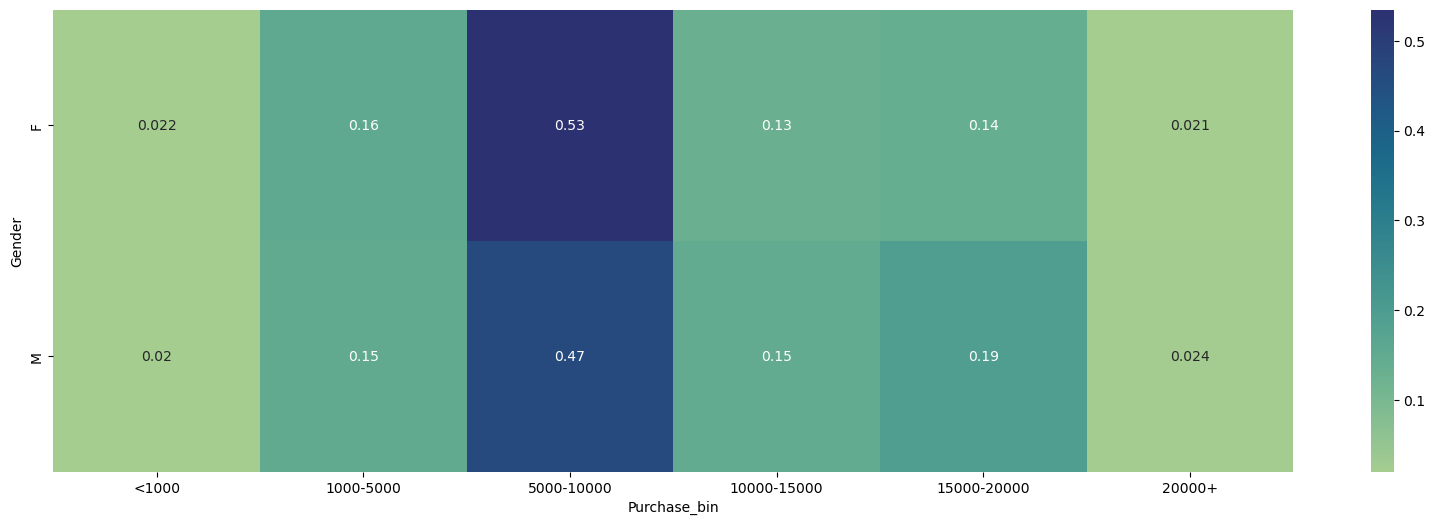

In [82]:
plt.figure(figsize=(20,6))
sns.heatmap(pd.crosstab(walmart['Gender'], walmart['Purchase_bin'], normalize='index'), annot=True, cmap='crest')
plt.show()

### <font color="black" style="sans-serif">Conditional Probability, P (Purchase_bin | Gender)</font>

1. Given that the customer is male, the probability of a customer purchasing items worth less than ${\$1000}$ is P (Purchase= <${\$1000}$ | Customer=Male) = 0.02.

2. Given that the customer is male, the probability of a customer purchasing items worth between ${\$1000}$ - ${\$5000}$ is P (Purchase= ${\$1000}$ - ${\$5000}$ | Customer= Male) = 0.15.

2. Given that the customer is male, the probability of a customer purchasing items worth between ${\$5000}$ - ${\$10000}$ is P (Purchase= ${\$5000}$ - ${\$10000}$ | Customer= Male) = 0.47.

3. Given that the customer is male, the probability of a customer purchasing items worth between ${\$10000}$ - ${\$15000}$ is P (Purchase= ${\$10000}$ - ${\$15000}$ | Customer= Male) = 0.15.

4. Given that the customer is male, the probability of a customer purchasing items worth between ${\$15000}$ - ${\$20000}$ is P (Purchase= ${\$15000}$ - ${\$20000}$ | Customer= Male) = 0.19.

5. Given that the customer is male, the probability of a customer purchasing items worth more than ${\$20000}$ is P (Purchase= >${\$20000}$ | Customer= Male) = 0.024.

1. Given that the customer is female, the probability of a customer purchasing items worth less than ${\$1000}$ is P (Purchase= <${\$1000}$ | Customer= Female) = 0.022.

2. Given that the customer is female, the probability of a customer purchasing items worth between \$1000 - \$5000 is P (Purchase= ${\$1000}$ - ${\$5000}$ | Customer= Female) = 0.16.

3. Given that the customer is female, the probability of a customer purchasing items worth between ${\$5000}$ - ${\$10000}$ is P (Purchase= ${\$5000}$ - ${\$10000}$ | Customer= Female) = 0.53.

3. Given that the customer is female, the probability of a customer purchasing items worth between ${\$10000}$ - ${\$15000}$ is P (Purchase= ${\$10000}$ - ${\$15000}$ | Customer= Female) = 0.13.

4. Given that the customer is female, the probability of a customer purchasing items worth between ${\$15000}$ - ${\$20000}$ is P (Purchase= ${\$15000}$ - ${\$20000}$ | Customer= Female) = 0.14.

5. Given that the customer is female, the probability of a customer purchasing items worth more than ${\$20000}$ is P (Purchase= >${\$20000}$ | Customer= Female) = 0.021.Purchase

Can also use pairplot for correlation

#### The median purchase expenditure for all city categories, regardless of gender, is nearly identical; slightly less in city category B
#### There is no outlier in the city in category C among male customers.
#### The interquartile (IQR) range for gender male is larger than female customers in each category

## Confidance Intervals for Male and Female purchases:
#### Getting Male and Female purchase data

In [29]:
purchase_female = walmart[(walmart["Gender"] == "F")]["Purchase"]
purchase_male = walmart[(walmart["Gender"] == "M")]["Purchase"]
purchase_male.describe()

count    414259.00000
mean       9437.52604
std        5092.18621
min          12.00000
25%        5863.00000
50%        8098.00000
75%       12454.00000
max       23961.00000
Name: Purchase, dtype: float64

In [30]:
purchase_female.describe()

count    135809.000000
mean       8734.565765
std        4767.233289
min          12.000000
25%        5433.000000
50%        7914.000000
75%       11400.000000
max       23959.000000
Name: Purchase, dtype: float64

In [31]:
male_sample_size = 1500
female_sample_size = 1000
num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = purchase_male.sample(male_sample_size, replace=True).mean()
    female_mean = purchase_female.sample(female_sample_size, replace=True).mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

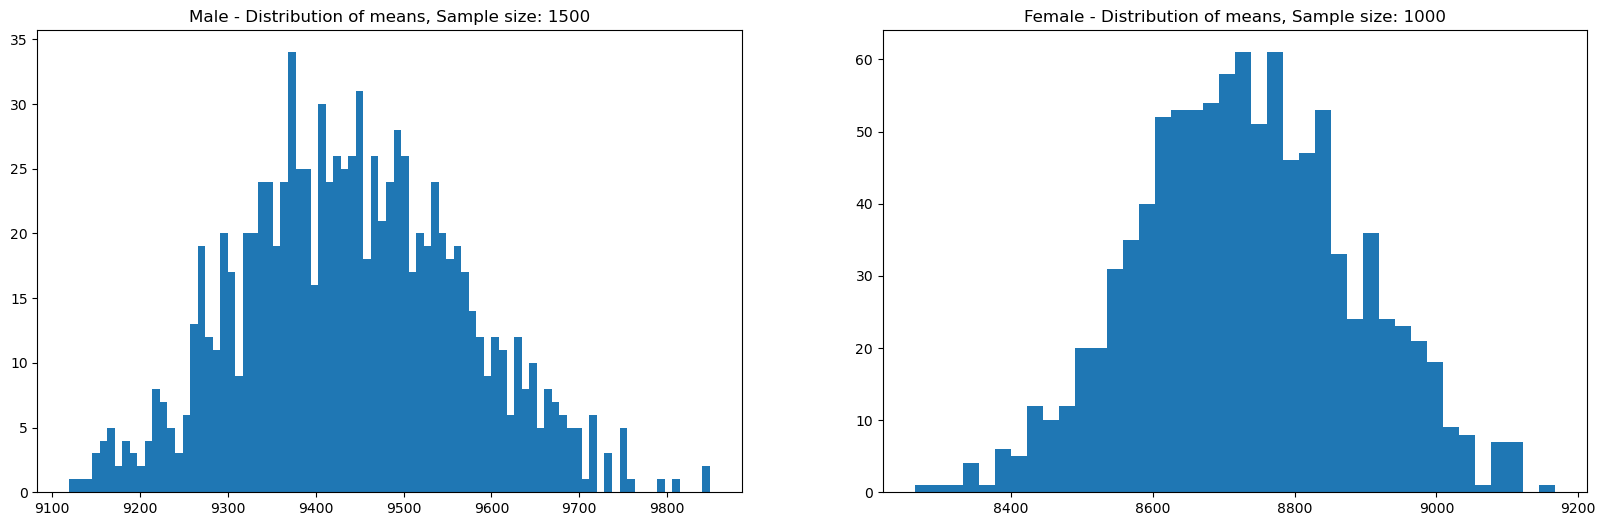

In [32]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=85)
axis[1].hist(female_means, bins=40)
axis[0].set_title("Male - Distribution of means, Sample size: 1500")
axis[1].set_title("Female - Distribution of means, Sample size: 1000")

plt.show()

In [33]:
print("Male - Mean of sample means of purchase amount for Male: {:.2f}".format(np.mean(male_means)))
print("Female - Mean of sample means of purchase amount for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample standard deviation: {:.2f}".format(pd.Series(male_means).std()))
print("Female - Sample standard deviation: {:.2f}".format(pd.Series(female_means).std()))

Male_samp_mean = np.mean(male_means)
Female_samp_mean = np.mean(female_means)

Male_Std_Err= pd.Series(male_means).std()/(np.sqrt(male_sample_size))
print('\nMale Standard Error',round(Male_Std_Err,2))

Female_Std_Err= pd.Series(female_means).std()/(np.sqrt(female_sample_size))
print('Female Standard Error',round(Female_Std_Err,2))

print('\nMale 90% CI  :', '[',round((Male_samp_mean)-1.64*Male_Std_Err,2),',',round((Male_samp_mean)+1.64*Male_Std_Err,2),']')
print('Female 90% CI:', '[',round((Female_samp_mean)-1.64*Female_Std_Err,2),',',round((Female_samp_mean)+1.64*Female_Std_Err,2),']')

print('\nMale 95% CI  :', '[',round((Male_samp_mean)-2*Male_Std_Err,2),',',round((Male_samp_mean)+2*Male_Std_Err,2),']')
print('Female 95% CI:', '[',round((Female_samp_mean)-2*Female_Std_Err,2),',',round((Female_samp_mean)+2*Female_Std_Err,2),']')

print('\nMale 99% CI  :', '[',round((Male_samp_mean)-2.57*Male_Std_Err,2),',',round((Male_samp_mean)+2.57*Male_Std_Err,2),']')
print('Female 99% CI:', '[',round((Female_samp_mean)-2.57*Female_Std_Err,2),',',round((Female_samp_mean)+2.57*Female_Std_Err,2),']')


Male - Mean of sample means of purchase amount for Male: 9442.25
Female - Mean of sample means of purchase amount for Female: 8731.68

Male - Sample standard deviation: 126.69
Female - Sample standard deviation: 152.56

Male Standard Error 3.27
Female Standard Error 4.82

Male 90% CI  : [ 9436.89 , 9447.62 ]
Female 90% CI: [ 8723.77 , 8739.59 ]

Male 95% CI  : [ 9435.71 , 9448.79 ]
Female 95% CI: [ 8722.03 , 8741.33 ]

Male 99% CI  : [ 9433.84 , 9450.66 ]
Female 99% CI: [ 8719.28 , 8744.08 ]


## Insights based on exploration and CLT:
### By comparing the sample and population average of female and male customers, it looks like male customers are spending more on the product.
### Clearly, there is no overlapping in CI purchasing between male and female customers.

## Confidance Intervals for Married and Unmarried purchases:
#### Getting Married and Unmarried purchase data
Lets Assume Marital_Status = 0 means Unmarried
and Marital_Status = 1 means Married

In [34]:
purchase_unmarried = walmart[(walmart["Marital_Status"] == 0)]["Purchase"]
purchase_married = walmart[(walmart["Marital_Status"] == 1)]["Purchase"]
purchase_unmarried.describe()

count    324731.000000
mean       9265.907619
std        5027.347859
min          12.000000
25%        5605.000000
50%        8044.000000
75%       12061.000000
max       23961.000000
Name: Purchase, dtype: float64

In [35]:
purchase_married.describe()

count    225337.000000
mean       9261.174574
std        5016.897378
min          12.000000
25%        5843.000000
50%        8051.000000
75%       12042.000000
max       23961.000000
Name: Purchase, dtype: float64

In [36]:
married_sample_size = 1500
unmarried_sample_size = 1000
num_repitions = 1000
married_means = []
unmarried_means = []

for i in range(num_repitions):
    married_mean = purchase_married.sample(married_sample_size, replace=True).mean()
    unmarried_mean = purchase_unmarried.sample(unmarried_sample_size, replace=True).mean()

    married_means.append(married_mean)
    unmarried_means.append(unmarried_mean)

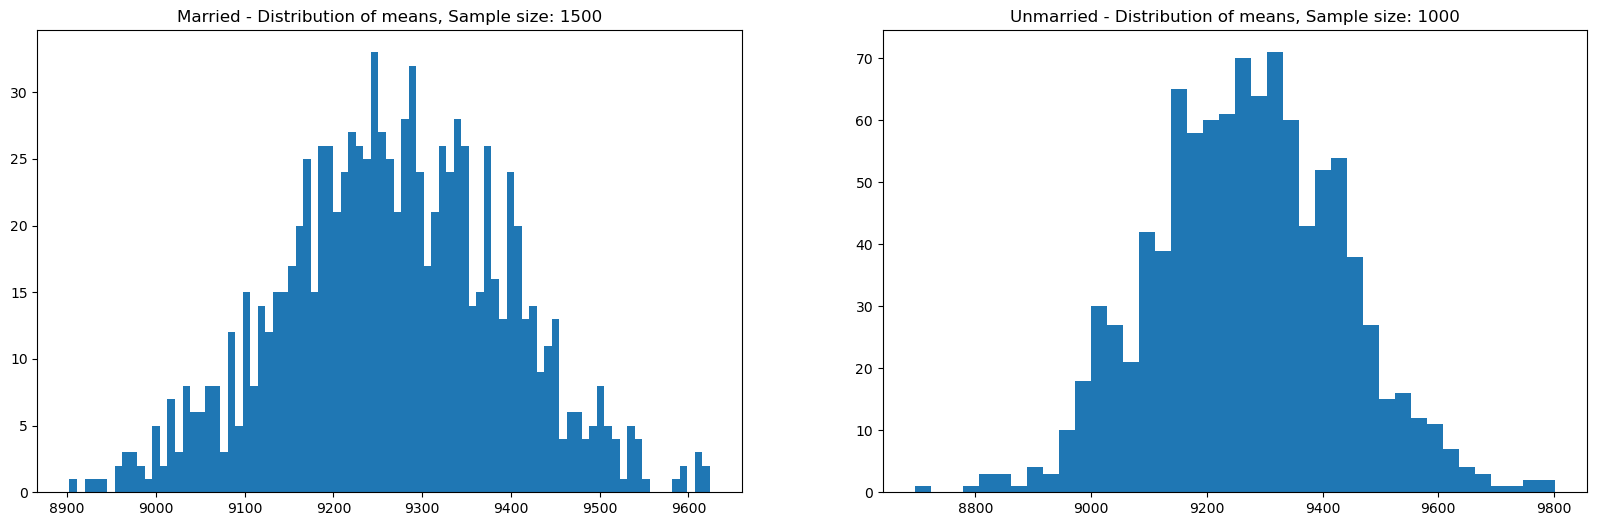

In [37]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=85)
axis[1].hist(unmarried_means, bins=40)
axis[0].set_title("Married - Distribution of means, Sample size: 1500")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 1000")

plt.show()

In [38]:
print("Married - Mean of sample means of purchase amount for Married: {:.2f}".format(np.mean(married_means)))
print("Unmarried - Mean of sample means of purchase amount for Unmarried: {:.2f}".format(np.mean(unmarried_means)))

print("\nMarried - Sample standard deviation: {:.2f}".format(pd.Series(married_means).std()))
print("Unmarried - Sample standard deviation: {:.2f}".format(pd.Series(unmarried_means).std()))

Married_samp_mean = np.mean(married_means)
Unmarried_samp_mean = np.mean(unmarried_means)

Married_Std_Err= pd.Series(married_means).std()/(np.sqrt(married_sample_size))
print('\nMarried Standard Error',round(Married_Std_Err,2))

Unmarried_Std_Err= pd.Series(unmarried_means).std()/(np.sqrt(unmarried_sample_size))
print('Unmarried Standard Error',round(Unmarried_Std_Err,2))

print('\nMarried 90% CI  :', '[',round((Married_samp_mean)-1.64*Married_Std_Err,2),',',round((Married_samp_mean)+1.64*Married_Std_Err,2),']')
print('Unmarried 90% CI:', '[',round((Unmarried_samp_mean)-1.64*Unmarried_Std_Err,2),',',round((Unmarried_samp_mean)+1.64*Unmarried_Std_Err,2),']')

print('\nMarried 95% CI  :', '[',round((Married_samp_mean)-2*Married_Std_Err,2),',',round((Married_samp_mean)+2*Married_Std_Err,2),']')
print('Unmarried 95% CI:', '[',round((Unmarried_samp_mean)-2*Unmarried_Std_Err,2),',',round((Unmarried_samp_mean)+2*Unmarried_Std_Err,2),']')

print('\nMarried 99% CI  :', '[',round((Married_samp_mean)-2.57*Married_Std_Err,2),',',round((Married_samp_mean)+2.57*Married_Std_Err,2),']')
print('Unmarried 99% CI:', '[',round((Unmarried_samp_mean)-2.57*Unmarried_Std_Err,2),',',round((Unmarried_samp_mean)+2.57*Unmarried_Std_Err,2),']')


Married - Mean of sample means of purchase amount for Married: 9267.68
Unmarried - Mean of sample means of purchase amount for Unmarried: 9269.74

Married - Sample standard deviation: 125.36
Unmarried - Sample standard deviation: 163.02

Married Standard Error 3.24
Unmarried Standard Error 5.16

Married 90% CI  : [ 9262.37 , 9272.98 ]
Unmarried 90% CI: [ 9261.29 , 9278.2 ]

Married 95% CI  : [ 9261.2 , 9274.15 ]
Unmarried 95% CI: [ 9259.43 , 9280.05 ]

Married 99% CI  : [ 9259.36 , 9275.99 ]
Unmarried 99% CI: [ 9256.49 , 9282.99 ]


### Clearly, there is overlap between multiple Confidence Intervals (C.I) between married and Unmarried  customers purchase at Walmart stores.
### There is no statistically significant difference in purchasing power between married and Unmarried people.

## Confidance Intervals Age group purchases:
#### Getting Age group purchase data

### Age group : 0-17

In [65]:
purchase_age_0_17 = walmart[(walmart["Age"] == "0-17")]["Purchase"]
purchase_age_0_17.describe()

age_0_17_sample_size = 1000
num_repitions = 500
age_0_17_means = []


for i in range(num_repitions):
    age_0_17_mean = purchase_age_0_17.sample(age_0_17_sample_size, replace=True).mean()

    age_0_17_means.append(age_0_17_mean)
    

print("Age 0-17 - Mean of sample means of purchase amount: {:.2f}".format(np.mean(age_0_17_means)))

print("\nAge 0-17 - Sample standard deviation: {:.2f}".format(pd.Series(age_0_17_means).std()))

age_0_17_samp_mean = np.mean(age_0_17_means)

age_0_17_Std_Err= pd.Series(age_0_17_means).std()/(np.sqrt(age_0_17_samp_mean))
print('\nAge 0-17 Standard Error',round(age_0_17_Std_Err,2))

print('\nAge 0-17 90% CI  :', '[',round((age_0_17_samp_mean)-1.64*age_0_17_Std_Err,2),',',round((age_0_17_samp_mean)+1.64*age_0_17_Std_Err,2),']')

print('\nAge 0-17 95% CI  :', '[',round((age_0_17_samp_mean)-2*age_0_17_Std_Err,2),',',round((age_0_17_samp_mean)+2*age_0_17_Std_Err,2),']')

print('\nAge 0-17 99% CI  :', '[',round((age_0_17_samp_mean)-2.57*age_0_17_Std_Err,2),',',round((age_0_17_samp_mean)+2.57*age_0_17_Std_Err,2),']')



Age 0-17 - Mean of sample means of purchase amount for Age 0-17: 8915.89

Age 0-17 - Sample standard deviation: 171.63

Age 0-17 Standard Error 1.82

Age 0-17 90% CI  : [ 8912.9 , 8918.87 ]

Age 0-17 95% CI  : [ 8912.25 , 8919.52 ]

Age 0-17 99% CI  : [ 8911.21 , 8920.56 ]


### Age group : 18-25

In [66]:
purchase_age_18_25 = walmart[(walmart["Age"] == "18-25")]["Purchase"]
purchase_age_18_25.describe()

age_18_25_sample_size = 1000
num_repitions = 500
age_18_25_means = []


for i in range(num_repitions):
    age_18_25_mean = purchase_age_18_25.sample(age_18_25_sample_size, replace=True).mean()

    age_18_25_means.append(age_18_25_mean)
    

print("Age 18-25 - Mean of sample means of purchase amount : {:.2f}".format(np.mean(age_18_25_means)))

print("\nAge 18-25 - Sample standard deviation: {:.2f}".format(pd.Series(age_18_25_means).std()))

age_18_25_samp_mean = np.mean(age_18_25_means)

age_18_25_Std_Err= pd.Series(age_18_25_means).std()/(np.sqrt(age_18_25_samp_mean))
print('\nAge 18-25 Standard Error',round(age_18_25_Std_Err,2))

print('\nAge 18-25 90% CI  :', '[',round((age_18_25_samp_mean)-1.64*age_18_25_Std_Err,2),',',round((age_18_25_samp_mean)+1.64*age_18_25_Std_Err,2),']')

print('\nAge 18-25 95% CI  :', '[',round((age_18_25_samp_mean)-2*age_18_25_Std_Err,2),',',round((age_18_25_samp_mean)+2*age_18_25_Std_Err,2),']')

print('\nAge 18-25 99% CI  :', '[',round((age_18_25_samp_mean)-2.57*age_18_25_Std_Err,2),',',round((age_18_25_samp_mean)+2.57*age_18_25_Std_Err,2),']')



Age 18-25 - Mean of sample means of purchase amount : 9162.82

Age 18-25 - Sample standard deviation: 161.04

Age 18-25 Standard Error 1.68

Age 18-25 90% CI  : [ 9160.06 , 9165.58 ]

Age 18-25 95% CI  : [ 9159.46 , 9166.19 ]

Age 18-25 99% CI  : [ 9158.5 , 9167.14 ]


### Age group : 26-35

In [67]:
purchase_age_26_35 = walmart[(walmart["Age"] == "26-35")]["Purchase"]
purchase_age_26_35.describe()

age_26_35_sample_size = 1000
num_repitions = 500
age_26_35_means = []


for i in range(num_repitions):
    age_26_35_mean = purchase_age_26_35.sample(age_26_35_sample_size, replace=True).mean()

    age_26_35_means.append(age_26_35_mean)
    
    
print("Age 26-35 - Mean of sample means of purchase amount : {:.2f}".format(np.mean(age_26_35_means)))

print("\nAge 26-35 - Sample standard deviation: {:.2f}".format(pd.Series(age_26_35_means).std()))

age_26_35_samp_mean = np.mean(age_26_35_means)

age_26_35_Std_Err= pd.Series(age_26_35_means).std()/(np.sqrt(age_26_35_samp_mean))
print('\nAge 26-35 Standard Error',round(age_26_35_Std_Err,2))

print('\nAge 26-35 90% CI  :', '[',round((age_26_35_samp_mean)-1.64*age_26_35_Std_Err,2),',',round((age_26_35_samp_mean)+1.64*age_26_35_Std_Err,2),']')

print('\nAge 26-35 95% CI  :', '[',round((age_26_35_samp_mean)-2*age_26_35_Std_Err,2),',',round((age_26_35_samp_mean)+2*age_26_35_Std_Err,2),']')

print('\nAge 26-35 99% CI  :', '[',round((age_26_35_samp_mean)-2.57*age_26_35_Std_Err,2),',',round((age_26_35_samp_mean)+2.57*age_26_35_Std_Err,2),']')


Age 26-35 - Mean of sample means of purchase amount : 9261.01

Age 26-35 - Sample standard deviation: 159.82

Age 26-35 Standard Error 1.66

Age 26-35 90% CI  : [ 9258.28 , 9263.73 ]

Age 26-35 95% CI  : [ 9257.69 , 9264.33 ]

Age 26-35 99% CI  : [ 9256.74 , 9265.28 ]


### Age group : 36-45

In [68]:
purchase_age_36_45 = walmart[(walmart["Age"] == "36-45")]["Purchase"]
purchase_age_36_45.describe()

age_36_45_sample_size = 1000
num_repitions = 500
age_36_45_means = []


for i in range(num_repitions):
    age_36_45_mean = purchase_age_36_45.sample(age_36_45_sample_size, replace=True).mean()

    age_36_45_means.append(age_36_45_mean)
    
    
print("Age 36-45 - Mean of sample means of purchase amount : {:.2f}".format(np.mean(age_36_45_means)))

print("\nAge 36-45 - Sample standard deviation: {:.2f}".format(pd.Series(age_36_45_means).std()))

age_36_45_samp_mean = np.mean(age_36_45_means)

age_36_45_Std_Err= pd.Series(age_36_45_means).std()/(np.sqrt(age_36_45_samp_mean))
print('\nAge 36-45 Standard Error',round(age_36_45_Std_Err,2))

print('\nAge 36-45 90% CI  :', '[',round((age_36_45_samp_mean)-1.64*age_36_45_Std_Err,2),',',round((age_36_45_samp_mean)+1.64*age_36_45_Std_Err,2),']')

print('\nAge 36-45 95% CI  :', '[',round((age_36_45_samp_mean)-2*age_36_45_Std_Err,2),',',round((age_36_45_samp_mean)+2*age_36_45_Std_Err,2),']')

print('\nAge 36-45 99% CI  :', '[',round((age_36_45_samp_mean)-2.57*age_36_45_Std_Err,2),',',round((age_36_45_samp_mean)+2.57*age_36_45_Std_Err,2),']')


Age 36-45 - Mean of sample means of purchase amount : 9327.53

Age 36-45 - Sample standard deviation: 150.12

Age 36-45 Standard Error 1.55

Age 36-45 90% CI  : [ 9324.98 , 9330.08 ]

Age 36-45 95% CI  : [ 9324.42 , 9330.64 ]

Age 36-45 99% CI  : [ 9323.54 , 9331.53 ]


### Age group : 46-50

In [69]:
purchase_age_46_50 = walmart[(walmart["Age"] == "46-50")]["Purchase"]
purchase_age_46_50.describe()

age_46_50_sample_size = 1000
num_repitions = 500
age_46_50_means = []


for i in range(num_repitions):
    age_46_50_mean = purchase_age_46_50.sample(age_46_50_sample_size, replace=True).mean()

    age_46_50_means.append(age_46_50_mean)
    
    
print("Age 46-50 - Mean of sample means of purchase amount : {:.2f}".format(np.mean(age_46_50_means)))

print("\nAge 46-50 - Sample standard deviation: {:.2f}".format(pd.Series(age_46_50_means).std()))

age_46_50_samp_mean = np.mean(age_46_50_means)

age_46_50_Std_Err= pd.Series(age_46_50_means).std()/(np.sqrt(age_46_50_samp_mean))
print('\nAge 46-50 Standard Error',round(age_46_50_Std_Err,2))

print('\nAge 46-50 90% CI  :', '[',round((age_46_50_samp_mean)-1.64*age_46_50_Std_Err,2),',',round((age_46_50_samp_mean)+1.64*age_46_50_Std_Err,2),']')

print('\nAge 46-50 95% CI  :', '[',round((age_46_50_samp_mean)-2*age_46_50_Std_Err,2),',',round((age_46_50_samp_mean)+2*age_46_50_Std_Err,2),']')

print('\nAge 46-50 99% CI  :', '[',round((age_46_50_samp_mean)-2.57*age_46_50_Std_Err,2),',',round((age_46_50_samp_mean)+2.57*age_46_50_Std_Err,2),']')


Age 46-50 - Mean of sample means of purchase amount : 9203.46

Age 46-50 - Sample standard deviation: 160.60

Age 46-50 Standard Error 1.67

Age 46-50 90% CI  : [ 9200.72 , 9206.21 ]

Age 46-50 95% CI  : [ 9200.11 , 9206.81 ]

Age 46-50 99% CI  : [ 9199.16 , 9207.76 ]


### Age group : 51-55

In [70]:
purchase_age_51_55 = walmart[(walmart["Age"] == "51-55")]["Purchase"]
purchase_age_51_55.describe()

age_51_55_sample_size = 1000
num_repitions = 500
age_51_55_means = []


for i in range(num_repitions):
    age_51_55_mean = purchase_age_51_55.sample(age_51_55_sample_size, replace=True).mean()

    age_51_55_means.append(age_51_55_mean)
    
    
print("Age 51-55 - Mean of sample means of purchase amount : {:.2f}".format(np.mean(age_51_55_means)))

print("\nAge 51-55 - Sample standard deviation: {:.2f}".format(pd.Series(age_51_55_means).std()))

age_51_55_samp_mean = np.mean(age_51_55_means)

age_51_55_Std_Err= pd.Series(age_51_55_means).std()/(np.sqrt(age_51_55_samp_mean))
print('\nAge 51-55 Standard Error',round(age_51_55_Std_Err,2))

print('\nAge 51-55 90% CI  :', '[',round((age_51_55_samp_mean)-1.64*age_51_55_Std_Err,2),',',round((age_51_55_samp_mean)+1.64*age_51_55_Std_Err,2),']')

print('\nAge 51-55 95% CI  :', '[',round((age_51_55_samp_mean)-2*age_51_55_Std_Err,2),',',round((age_51_55_samp_mean)+2*age_51_55_Std_Err,2),']')

print('\nAge 51-55 99% CI  :', '[',round((age_51_55_samp_mean)-2.57*age_51_55_Std_Err,2),',',round((age_51_55_samp_mean)+2.57*age_51_55_Std_Err,2),']')


Age 51-55 - Mean of sample means of purchase amount : 9531.17

Age 51-55 - Sample standard deviation: 161.54

Age 51-55 Standard Error 1.65

Age 51-55 90% CI  : [ 9528.45 , 9533.88 ]

Age 51-55 95% CI  : [ 9527.86 , 9534.47 ]

Age 51-55 99% CI  : [ 9526.91 , 9535.42 ]


### Age group : 55+

In [71]:
purchase_age_55p = walmart[(walmart["Age"] == "55+")]["Purchase"]
purchase_age_55p.describe()

age_55p_sample_size = 1000
num_repitions = 500
age_55p_means = []


for i in range(num_repitions):
    age_55p_mean = purchase_age_55p.sample(age_55p_sample_size, replace=True).mean()

    age_55p_means.append(age_55p_mean)
    
    
print("Age 55+ - Mean of sample means of purchase amount : {:.2f}".format(np.mean(age_55p_means)))

print("\nAge 55+ - Sample standard deviation: {:.2f}".format(pd.Series(age_55p_means).std()))

age_55p_samp_mean = np.mean(age_55p_means)

age_55p_Std_Err= pd.Series(age_55p_means).std()/(np.sqrt(age_55p_samp_mean))
print('\nAge 55+ Standard Error',round(age_55p_Std_Err,2))

print('\nAge 55+ 90% CI  :', '[',round((age_55p_samp_mean)-1.64*age_55p_Std_Err,2),',',round((age_55p_samp_mean)+1.64*age_55p_Std_Err,2),']')

print('\nAge 55+ 95% CI  :', '[',round((age_55p_samp_mean)-2*age_55p_Std_Err,2),',',round((age_55p_samp_mean)+2*age_55p_Std_Err,2),']')

print('\nAge 55+ 99% CI  :', '[',round((age_55p_samp_mean)-2.57*age_55p_Std_Err,2),',',round((age_55p_samp_mean)+2.57*age_55p_Std_Err,2),']')


Age 55+ - Mean of sample means of purchase amount : 9327.89

Age 55+ - Sample standard deviation: 163.08

Age 55+ Standard Error 1.69

Age 55+ 90% CI  : [ 9325.12 , 9330.66 ]

Age 55+ 95% CI  : [ 9324.51 , 9331.27 ]

Age 55+ 99% CI  : [ 9323.55 , 9332.23 ]


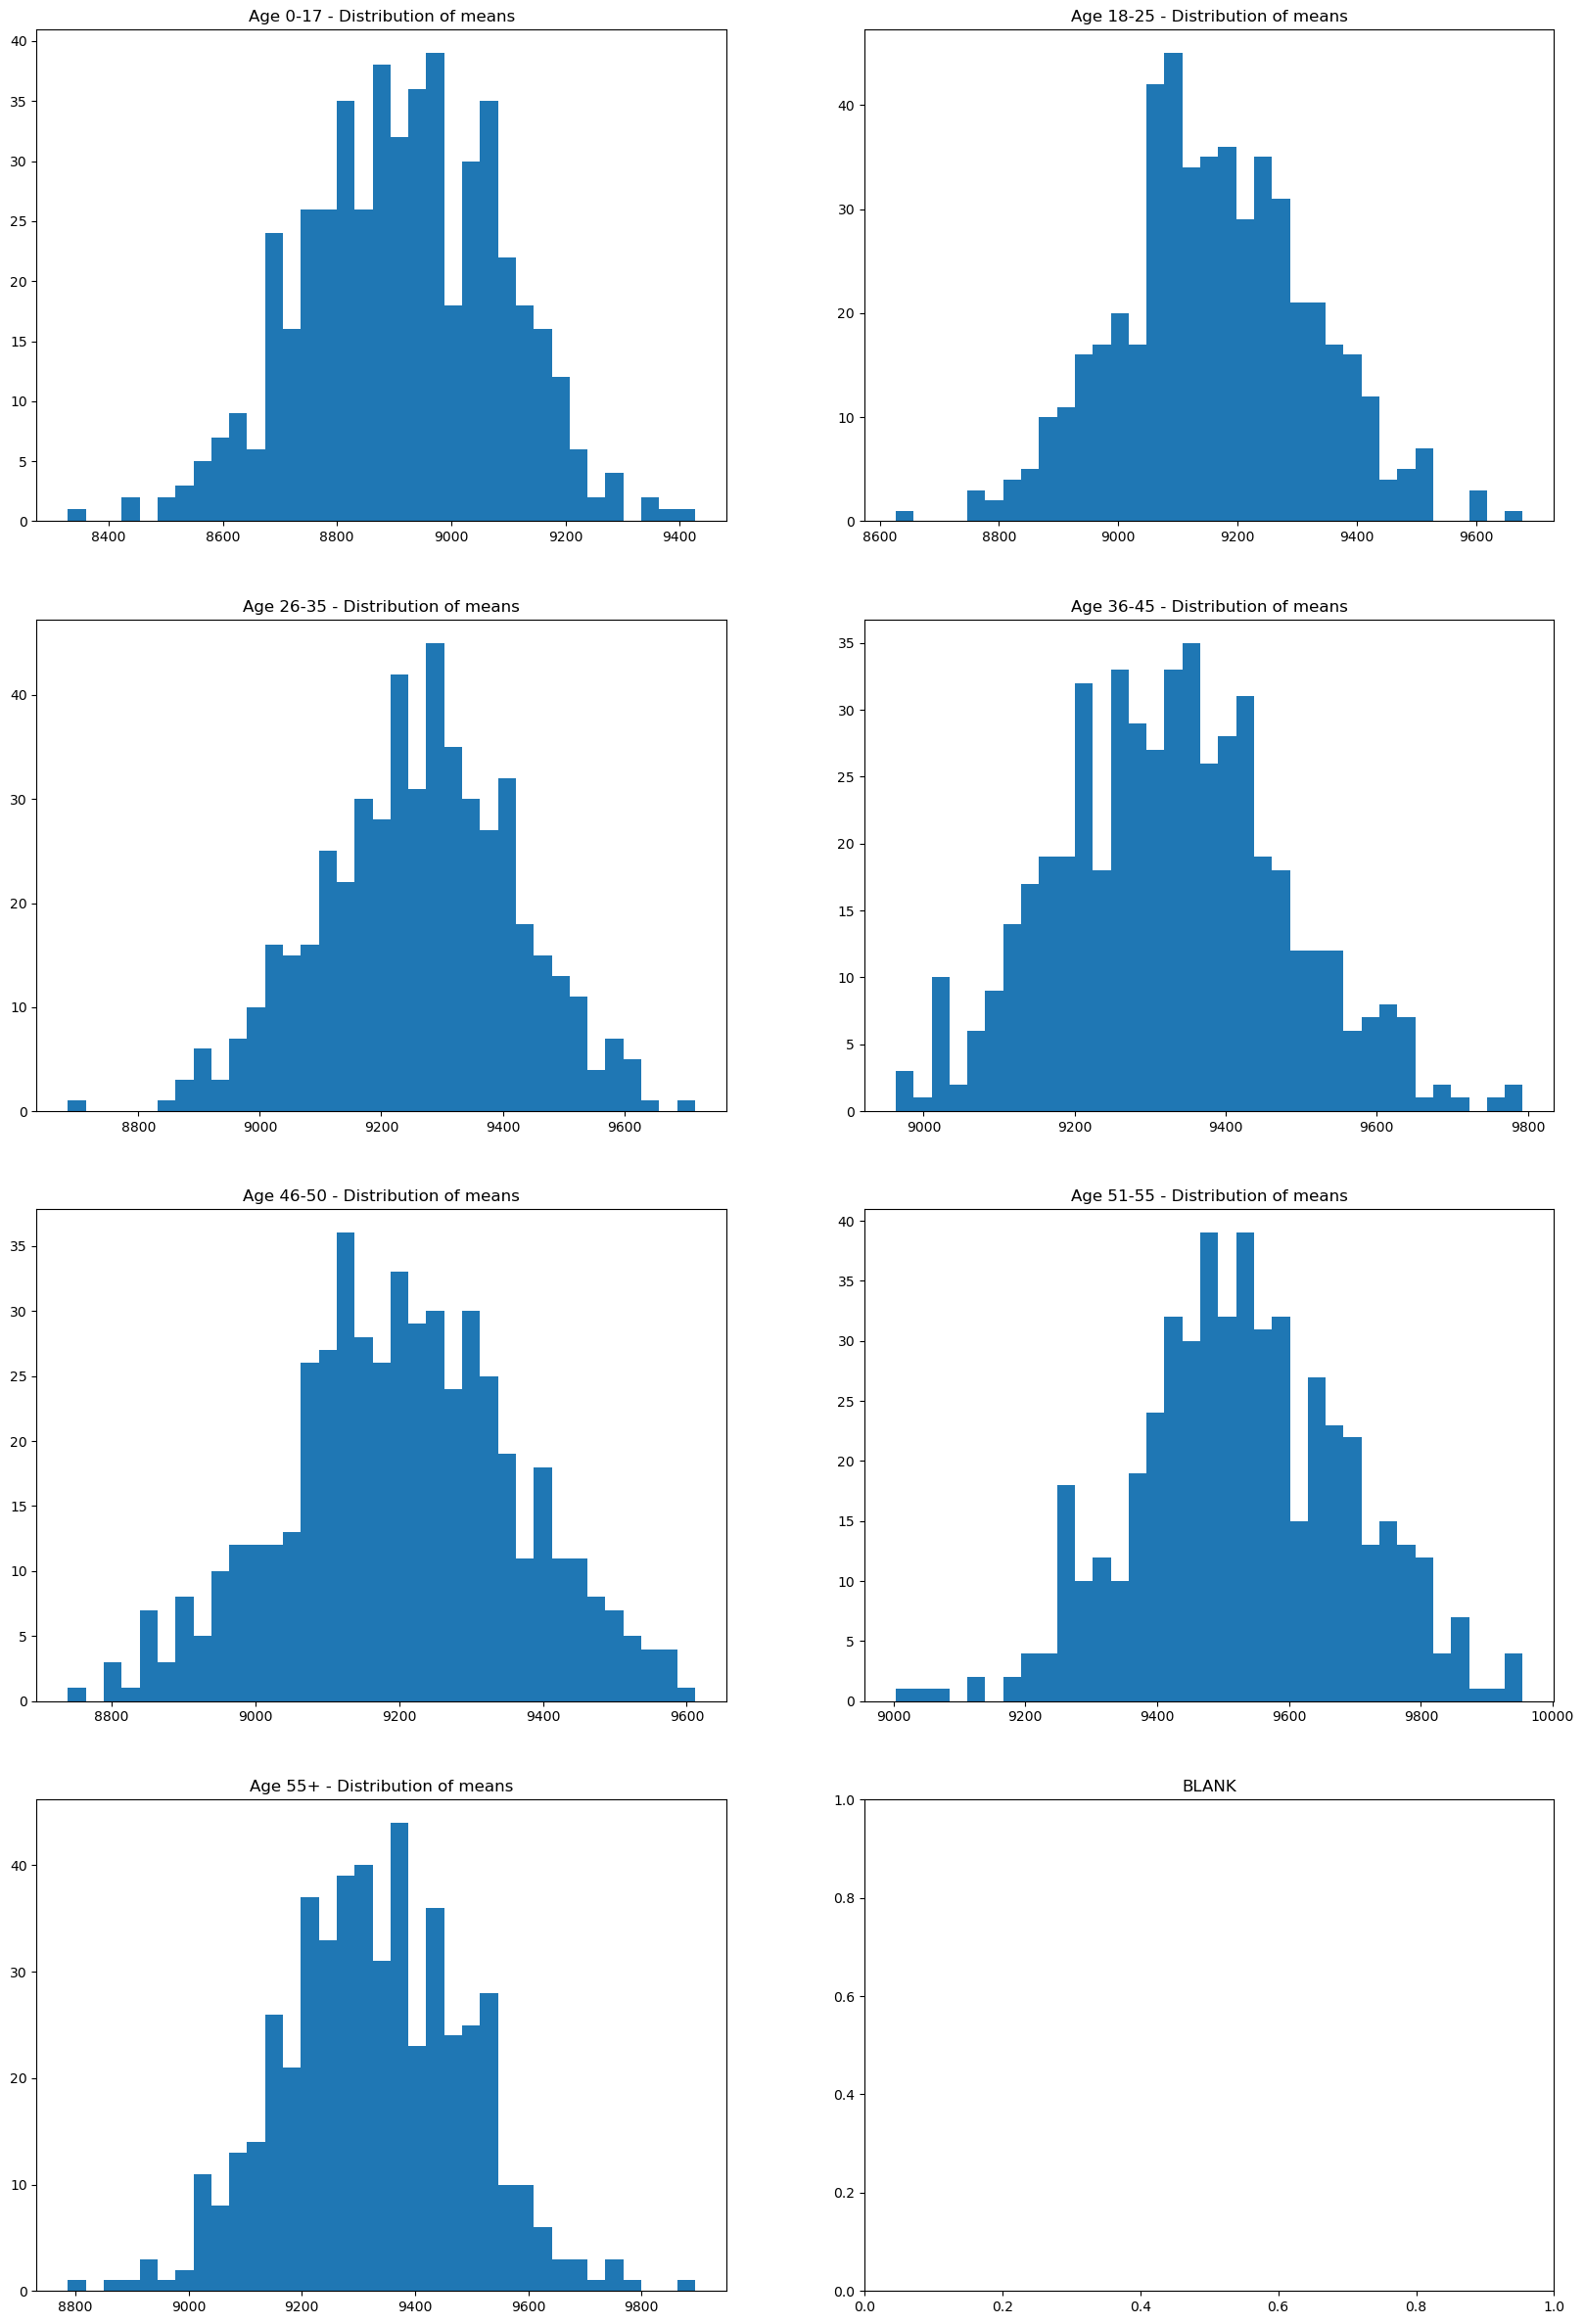

In [76]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))

axis[0,0].hist(age_0_17_means, bins=35)
axis[0,0].set_title("Age 0-17 - Distribution of means")
axis[0,1].hist(age_18_25_means, bins=35)
axis[0,1].set_title("Age 18-25 - Distribution of means")

axis[1,0].hist(age_26_35_means, bins=35)
axis[1,0].set_title("Age 26-35 - Distribution of means")
axis[1,1].hist(age_36_45_means, bins=35)
axis[1,1].set_title("Age 36-45 - Distribution of means")

axis[2,0].hist(age_46_50_means, bins=35)
axis[2,0].set_title("Age 46-50 - Distribution of means")
axis[2,1].hist(age_51_55_means, bins=35)
axis[2,1].set_title("Age 51-55 - Distribution of means")

axis[3,0].hist(age_55p_means, bins=35)
axis[3,0].set_title("Age 55+ - Distribution of means")

axis[3,1].set_title("BLANK")
#axis[3,1].hist(age_0_17_means, bins=35)

plt.show()

### On average, the age group 51–55 spends the most amount of money at Walmart stores, followed by the age group of 55+ and 36–45. The reason for this is that they might be buying medicine or medical equipment along with their regular groceries. 

### The least average expenditure is among the age group of 0–17, which makes sense, as parents might be buying for them.

## Final Insights:
### 1. By using the Central Limit Theorem with bootstrapped samples, we can see that the sample mean of bootstrapped is close to the population mean for all the features with respect to purchase.
### 2. There is no overlapping in purchasing expenditure between male and female customers.
### 3. There is no statistically significant difference in purchasing power between married and single people.
### 4. User ID 1001680 is the most frequent customer, followed by 1004277 and 1001941, respectively.
### 5. The majority of customers only stay in the city for one year, making up 35% of the customers.

## Recommendations:
### 1. Walmart can increase purchase by by running campaigns on for Women's day, and Mother's day.
### 2. Walmart can launch special schemes for women like  discounts, and coupons etc.
### 3. Walmart can advertise with banners and fliers in city categories where sale is comparatively low (like city category A, and C)
### 4. Walmart can indentify repetitive customers (who places more number of orders) and retain them with some discount on future orders
### 5. Walmart can advertise more for product category who's sale is low 
